In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# Load dataset
df = pd.read_csv("C:\\Users\\abhay\\Desktop\\ieee==join\\international_matches.csv")


In [4]:
print(df.head())
print(df.isnull().sum())
print(df.describe())


         date home_team     away_team home_team_continent away_team_continent  \
0  1993-08-08   Bolivia       Uruguay       South America       South America   
1  1993-08-08    Brazil        Mexico       South America       North America   
2  1993-08-08   Ecuador     Venezuela       South America       South America   
3  1993-08-08    Guinea  Sierra Leone              Africa              Africa   
4  1993-08-08  Paraguay     Argentina       South America       South America   

   home_team_fifa_rank  away_team_fifa_rank  home_team_total_fifa_points  \
0                   59                   22                            0   
1                    8                   14                            0   
2                   35                   94                            0   
3                   65                   86                            0   
4                   67                    5                            0   

   away_team_total_fifa_points  home_team_score  ...  sh

In [5]:
# Identify columns with null values
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())

# Drop rows with null values
df.dropna(subset=null_columns, inplace=True)
df.fillna({
    'home_team_goalkeeper_score': 0,
    'away_team_goalkeeper_score': 0,
    'home_team_mean_defense_score': 0,
    'home_team_mean_offense_score': 0,
    'home_team_mean_midfield_score': 0,
    'away_team_mean_defense_score': 0,
    'away_team_mean_offense_score': 0,
    'away_team_mean_midfield_score': 0
}, inplace=True)

# Check if there are any remaining null values
print(df.isnull().sum())


home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64
date                             0
home_team                        0
away_team                        0
home_team_continent              0
away_team_continent              0
home_team_fifa_rank              0
away_team_fifa_rank              0
home_team_total_fifa_points      0
away_team_total_fifa_points      0
home_team_score                  0
away_team_score                  0
tournament                       0
city                             0
country                          0
neutral_location                 0
shoot_out                        0
home_team_result                 0
home_team_goalkeeper_score       0
away_team_goalkeeper_score       0
home_team_

In [6]:
df['date'] = pd.to_datetime(df['date'])
df = pd.get_dummies(df, columns=['home_team_continent', 'away_team_continent', 'tournament', 'city', 'country', 'neutral_location', 'shoot_out', 'home_team_result'], drop_first=True)
X = df.drop(['date', 'home_team', 'away_team', 'home_team_result_Win'], axis=1)  # Drop date, home_team, away_team, and home_team_result_Win (use home_team_result_Lose as target)
y = df['home_team_result_Win']  # Use 'home_team_result_Win' as target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

Accuracy: 93.26%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       480
           1       0.92      0.93      0.92       381

    accuracy                           0.93       861
   macro avg       0.93      0.93      0.93       861
weighted avg       0.93      0.93      0.93       861



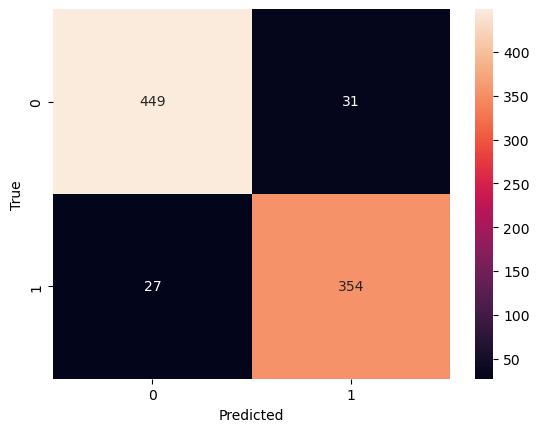

In [7]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()